In [92]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

In [93]:
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")

C:\Users\ilankhirin\AppData\Roaming\Python\Python311\site-packages\transformers\models\segformer\image_processing_segformer.py:100: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [94]:
# url = "https://lh3.googleusercontent.com/pw/AIL4fc_SQq1OpK_TLxLVb_2UDkjT6DjB7f1unVdDCPZKLdAAXlYxQqX-MXrhI4wrX8pOh_5nKFu0wkW97bAwbbPnXkx9EgOUDmCK0ZVeQ1SfTWghjwSNTjK9dKmh8bnoFS3vc3JzTb5dyBGbHj0fLjD6h50hgLSBIsnrzlupN_vRhEdbJLWXEigYn3wBTQ6nehOZ1el8TVPRrjlDIs98fPzZI3paU_y7d3ZOtYo0F25ptB3SVNDmCeSOXYg-e45A9K97WyAuQ-UM7tubWwP4E7BO2wszjnSsE9DqXjkzgz1Tq6sXqSt5mgli3kYdwmPXq7JTvCREVpFQLzO_OuckNlGPIN9QsVlLt9uIVj5b2ChScHYjwMxQwhTPZYYxQosvp39guyu7QqLRW3w1aJ1UZfgJcCJEKpBkl0YOPC69K7kVZH4nukcFTHgo2VMSC46njz_8BmDpyfPOZmCxpKz6csDRPUAq4fG2DNSq427EuGHYD266tl9GkT4QezVMMxmk2IyDDJTiiLJuvZV5eO61oOTQBXnyK9R-jHfAbwcnXJZEB4vJwCU3sGEY2dUSH8xZKqSH_Qa73yC_iXPksCc-IL6ZcmJ8RE-8zWvFl6T90DhinhoNi6-MswYXaXgtApkazLYKwm4SQ3vhHQa8FPQcIp9ONEkYcXCXGKWaE2gKteEPk63jbDAAB6JdS5jDzPbUYSZny8YUjY7O1RNBhY-6QDCqHdojmDmZC4wbaFy4uds99dCuMhfZZTwdqx9hT-c5lIKca6s5je10f58xhOb0OEVEZU9Bk_VjsFVoBYU_CXTffPzUAnw7WgbqLaVZRFf2ADm6cZ6gAmXDFHN3Oe_bVyg2gO6cPxC--HUe_POIUXEBosan4b9Wfzh_SjHCVosAtYL00LGtoNbLDMXfz-5lfrZebAi_iw=w990-h1315-s-no?authuser=0"
# url = 'https://lh3.googleusercontent.com/pw/AIL4fc9899mig1GiaW7UsfeQ48M0F0hKXzg1je76lHcBP2o1HWB9mJ1_2IXzwoa5ap5L7cfq_164OfXuQCT1Jc6EhuC1yPGYG_BbNatvgPcKQSEXC-aI5VbWtco1nisVqJFVSNUSBMzX9wyQVUKNRhTX5v_Qk5RvxKF7yoyaBaOIQzoKbKfUi9v2rwiHFsWTFSvGMOqHOgUJSY7Cx4q6rlSfvW3_2Fc4ryiSt5KuP1U8oZdLvuhQCNPH5tTjye8u5gN3KsGf4t99GKZIikwXEHy8uMA0z4qGLBM7DxPzPERIEuKNRrkxh58dzBekZVCy4PjYVZC4MjlnQfbPjLFcdjcgczqM5epnkOkP63JuM29ZBbh08fvCQMySmV5tRjNspYRzdA1A5eEzAP-eid37x57OHp0jlR0dBx2be2evEwGw754BqHRJxJr9rJcNjjyEirz-y02SBGaby7ZatUwBiN7nmz54o2xralLfRJlDpCfJ98qvSbHYuNfpxB-xWHG1yKVjS90VP4xY3cEdTrgfqb0znEA_1KfQHYVQDY5KHnU42jCYuC_iHq43FmBecaR2_QJR3Fu4daKAYJWAltPGA3P69slZJKjdrbTRsz7aWJQMb2PwL1wWV2fSOjHVP8od5GyLPg1AVsLMbRuUvk8w5s-V5UxpTu1JCLv2rhZW3NU1lYZuqfoj_Zm8B84yArKFJGFuaHNOn9YLHYRK0VE0EDtHboNFAgUrejssL15Iv9w4t3bvcmIFcPKNhybABNdPTXZ-_p_7W3jp1wexrpBeZjghSjAPwJOM4ouZ0mj6exaQdLhYGdl5Ybk9WGxp_nmFQIugTFd7JdBzCMeO6GOVKbDx54DfRp8DQxKoLVVMJHkY8OIi56FB-oN6fvmPwS6j5E2vRaBk32jG6V7a-5e9krVwdPMMjw=w986-h1315-s-no?authuser=0'
# url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
url = "C:\\Users\\ilankhirin\\Downloads\\png2jpg\\ilan-example.jpg"
url = "C:\\Users\\ilankhirin\\Downloads\\png2jpg\\yehuda-example.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(url)

In [95]:
inputs = processor(images=image, return_tensors="pt")
print(f'inputs {inputs.pixel_values.shape}')
outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

print(f'upsampled_logits {upsampled_logits.shape}')

pred_seg = upsampled_logits.argmax(dim=1)[0]
print(pred_seg.shape)
print(f'pred_seg {pred_seg.shape}')



inputs torch.Size([1, 3, 512, 512])


KeyboardInterrupt: 

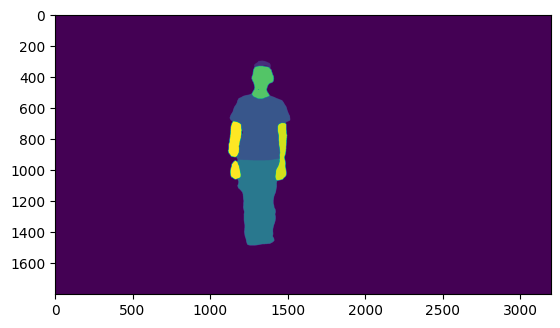

In [ ]:
plt.imshow(pred_seg)

<class 'torch.Tensor'>
tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4])


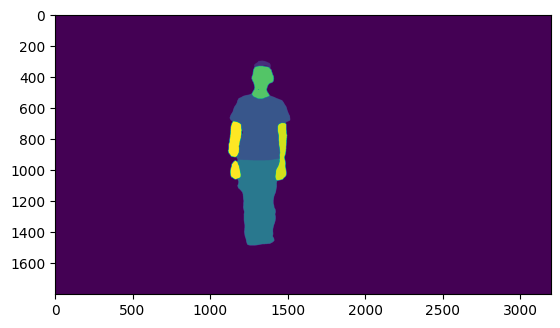

In [ ]:
# Create segmentation array
# Image object should be of type PIL.Image
# Returns torch.Tensor
# 0 - Background
# 1 - Hat
# 2 - Hair
# 3 - Sunglasses
# 4 - Upper-clothes
# 5 - Skirt
# 6 - Pants
# 7 - Dress
# 8 - Belt
# 9 - Left-shoe
# 10 - Right-shoe
# 11 - Face
# 12 - Left-leg
# 13 - Right-leg
# 14 - Left-arm
# 15 - Right-arm
# 16 - Bag
# 17 - Scarf
def get_segmentation_array(img):
    inputs = processor(images=img, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits.cpu()

    upsampled_logits = nn.functional.interpolate(
        logits,
        size=image.size[::-1],
        mode="bilinear",
        align_corners=False,
    )

    pred_seg = upsampled_logits.argmax(dim=1)[0]
    print(type(pred_seg))
    return pred_seg

url = "C:\\Users\\ilankhirin\\Downloads\\png2jpg\\yehuda-example.jpg"
image = Image.open(url)
pred_seg = get_segmentation_array(image)
plt.imshow(pred_seg)

print(pred_seg[800][1250:1350])

[{'label_key': 'shirt', 'box': [1127, 514, 389, 426]}, {'label_key': 'pants', 'box': [1171, 920, 277, 566]}]


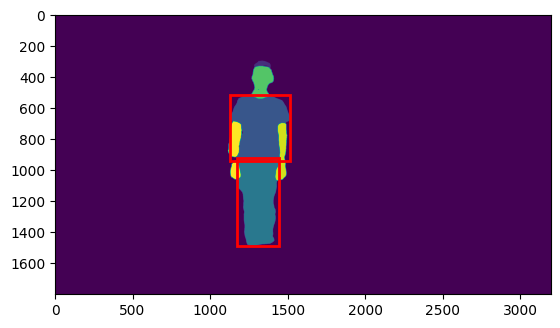

In [ ]:
# Given a matrix of segmentation values, return the bounding box of the shirt
# Returns a tuple of (upper_x, upper_y, width, height)
def get_bbox_for_label(seg_matrix_numpy, label):
    mask = seg_matrix_numpy == label
    indices = np.argwhere(mask)
    x_min = np.min(indices[:, 1])
    x_max = np.max(indices[:, 1])
    y_min = np.min(indices[:, 0])
    y_max = np.max(indices[:, 0])
    width = abs(x_max - x_min)
    height = abs(y_max - y_min)
    return [x_min, y_min, width, height]

def get_clothing_boxes(seg_matrix_numpy):
    shirt_label = 4
    pants_label = 6
    shirt_bbox = {
        'label_key': 'shirt',
        'box': get_bbox_for_label(seg_matrix_numpy, shirt_label)
    }
    pants_bbox = {
        'label_key': 'pants',
        'box': get_bbox_for_label(seg_matrix_numpy, pants_label)
    }

    return [shirt_bbox, pants_bbox]

boxes = get_clothing_boxes(pred_seg.numpy())
print(boxes)
shirt = boxes[0]
pants = boxes[1]
plt.imshow(pred_seg)
plt.gca().add_patch(plt.Rectangle((shirt['box'][0], shirt['box'][1]), shirt['box'][2], shirt['box'][3], fill=False, edgecolor='red', linewidth=2))
plt.gca().add_patch(plt.Rectangle((pants['box'][0], pants['box'][1]), pants['box'][2], pants['box'][3], fill=False, edgecolor='red', linewidth=2))
plt.show()